In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from matplotlib.transforms import Bbox
from matplotlib.lines import Line2D
import xarray as xr
import warnings
warnings.filterwarnings('ignore')

In [2]:
# open dataset
dataset = xr.open_dataset('./data/kazar-data-concat-mar13-mar14.nc')

# get reflectivity, doppler velocity and spectral width variables
reflectivity = dataset['reflectivity_best_estimate']
spectral_width = dataset['spectral_width']
doppler_velocity = dataset['mean_doppler_velocity']
lwp = dataset['mwr_lwp']
height = dataset['height']

### _Reflectivity groupings by times (5 decay, 11 Mature and 21 developing)_

In [3]:
# Decaying cells for reflectivity
ref_time_ranges_decay = [
    ('2020-03-13 10:00:12', '2020-03-13 10:11:56'), #3
    ('2020-03-13 16:29:40', '2020-03-13 16:38:20'), #17
    ('2020-03-13 23:38:56', '2020-03-14 00:16:28'), #29
    ('2020-03-14 00:13:24', '2020-03-14 00:30:44'), #30
    ('2020-03-14 03:17:16', '2020-03-14 03:41:20'), # 34
]

# Mature cells for reflectivity
ref_time_ranges_matured = [
    ('2020-03-13 08:12:28', '2020-03-13 09:06:36'), #1
    ('2020-03-13 11:00:32', '2020-03-13 11:32:28'), #7
    ('2020-03-13 11:48:08', '2020-03-13 12:09:04'), #9
    ('2020-03-13 12:03:08', '2020-03-13 12:38:04'), #10
    ('2020-03-13 12:32:48', '2020-03-13 13:14:32'), #11
    ('2020-03-13 15:09:36', '2020-03-13 15:45:20'), #14
    ('2020-03-13 21:48:20', '2020-03-13 22:13:00'), #27
    ('2020-03-13 22:28:24', '2020-03-13 23:00:00'), #28
    ('2020-03-14 01:06:40', '2020-03-14 01:24:08'), #31
    ('2020-03-14 03:57:16', '2020-03-14 04:31:56'), #35
    ('2020-03-14 04:27:40', '2020-03-14 04:50:20'), #36
]

# Developing for reflectivity
ref_time_ranges_developing = [
    ('2020-03-13 09:12:48', '2020-03-13 09:58:16'), #2
    ('2020-03-13 10:14:32', '2020-03-13 10:29:00'), #4
    ('2020-03-13 10:22:40', '2020-03-13 10:46:56'), #5
    ('2020-03-13 10:42:32', '2020-03-13 10:59:04'), #6
    ('2020-03-13 11:30:44', '2020-03-13 11:51:52'), #8
    ('2020-03-13 13:53:00', '2020-03-13 14:05:16'), #12
    ('2020-03-13 14:03:28', '2020-03-13 14:31:20'), #13
    ('2020-03-13 15:48:00', '2020-03-13 16:12:44'), #15
    ('2020-03-13 16:12:00', '2020-03-13 16:33:44'), #16
    ('2020-03-13 16:44:24', '2020-03-13 17:13:32'), #18
    ('2020-03-13 17:12:56', '2020-03-13 17:45:48'), #19
    ('2020-03-13 18:10:04', '2020-03-13 18:28:04'), #20
    ('2020-03-13 18:27:28', '2020-03-13 18:50:04'), #21
    ('2020-03-13 19:15:32', '2020-03-13 19:54:00'), #22
    ('2020-03-13 19:47:12', '2020-03-13 20:15:52'), #23
    ('2020-03-13 20:14:12', '2020-03-13 20:48:12'), #24
    ('2020-03-13 20:48:36', '2020-03-13 21:21:40'), #25
    ('2020-03-13 21:27:40', '2020-03-13 21:50:48'), #26
    ('2020-03-14 02:19:20', '2020-03-14 02:34:36'), #32
    ('2020-03-14 02:43:24', '2020-03-14 03:12:44'), #33
    ('2020-03-14 04:49:56', '2020-03-14 05:19:48') #37
    
]

In [4]:
f"decay cells: {len(ref_time_ranges_decay)}, matured cells: {len(ref_time_ranges_matured)}, developing cell : {len(ref_time_ranges_developing)} = {len(ref_time_ranges_decay)+len(ref_time_ranges_matured)+ len(ref_time_ranges_developing)} cells"

'decay cells: 5, matured cells: 11, developing cell : 21 = 37 cells'

### _Doppler velocity groupings by times (3 decay, 16 Mature and 18 developing)_

In [5]:
# Decaying cells for doppler velocity
vel_time_ranges_decay = [
    ('2020-03-13 10:00:12', '2020-03-13 10:11:56'), #3
    ('2020-03-14 01:06:40', '2020-03-14 01:24:08'), #31
    ('2020-03-14 02:43:24', '2020-03-14 03:12:44'), #33
]

# Mature cells for doppler velocity
vel_time_ranges_matured = [
    ('2020-03-13 08:12:28', '2020-03-13 09:06:36'), #1
    ('2020-03-13 11:00:32', '2020-03-13 11:32:28'), #7
    ('2020-03-13 11:48:08', '2020-03-13 12:09:04'), #9
    ('2020-03-13 12:03:08', '2020-03-13 12:38:04'), #10
    ('2020-03-13 12:32:48', '2020-03-13 13:14:32'), #11
    ('2020-03-13 13:53:00', '2020-03-13 14:05:16'), #12
    ('2020-03-13 15:09:36', '2020-03-13 15:45:20'), #14
    ('2020-03-13 16:44:24', '2020-03-13 17:13:32'), #18
    ('2020-03-13 17:12:56', '2020-03-13 17:45:48'), #19
    ('2020-03-13 18:27:28', '2020-03-13 18:50:04'), #21
    ('2020-03-13 20:14:12', '2020-03-13 20:48:12'), #24
    ('2020-03-13 20:48:36', '2020-03-13 21:21:40'), #25
    ('2020-03-13 21:48:20', '2020-03-13 22:13:00'), #27
    ('2020-03-13 22:28:24', '2020-03-13 23:00:00'), #28
    ('2020-03-14 03:57:16', '2020-03-14 04:31:56'), #35
    ('2020-03-14 04:27:40', '2020-03-14 04:50:20'), #36
]

# Developing for doppler velocity
vel_time_ranges_developing = [
    ('2020-03-13 09:12:48', '2020-03-13 09:58:16'), #2
    ('2020-03-13 10:14:32', '2020-03-13 10:29:00'), #4
    ('2020-03-13 10:22:40', '2020-03-13 10:46:56'), #5
    ('2020-03-13 10:42:32', '2020-03-13 10:59:04'), #6
    ('2020-03-13 11:30:44', '2020-03-13 11:51:52'), #8
    ('2020-03-13 14:03:28', '2020-03-13 14:31:20'), #13
    ('2020-03-13 15:48:00', '2020-03-13 16:12:44'), #15
    ('2020-03-13 16:12:00', '2020-03-13 16:33:44'), #16
    ('2020-03-13 16:29:40', '2020-03-13 16:38:20'), #17
    ('2020-03-13 18:10:04', '2020-03-13 18:28:04'), #20
    ('2020-03-13 19:15:32', '2020-03-13 19:54:00'), #22
    ('2020-03-13 19:47:12', '2020-03-13 20:15:52'), #23
    ('2020-03-13 21:27:40', '2020-03-13 21:50:48'), #26
    ('2020-03-13 23:38:56', '2020-03-14 00:16:28'), #29
    ('2020-03-14 00:13:24', '2020-03-14 00:30:44'), #30
    ('2020-03-14 02:19:20', '2020-03-14 02:34:36'), #32
    ('2020-03-14 03:17:16', '2020-03-14 03:41:20'), #34
    ('2020-03-14 04:49:56', '2020-03-14 05:19:48') #37
    
]

In [6]:
f"decay cells: {len(vel_time_ranges_decay)}, nmatured cells: {len(vel_time_ranges_matured)}, developing cell : {len(vel_time_ranges_developing)} = {len(vel_time_ranges_decay)+len(vel_time_ranges_matured)+ len(vel_time_ranges_developing)} cells"

'decay cells: 3, nmatured cells: 16, developing cell : 18 = 37 cells'

### _Spectral Width groupings by times (3 decay, 16 Mature and 18 developing)_

In [7]:
# Decaying cells for spectral width
sw_time_ranges_decay = [
    ('2020-03-13 10:00:12', '2020-03-13 10:11:56'), #3
    ('2020-03-13 10:14:32', '2020-03-13 10:29:00'), #4
    ('2020-03-13 10:22:40', '2020-03-13 10:46:56'), #5
    ('2020-03-13 10:42:32', '2020-03-13 10:59:04'), #6
    ('2020-03-13 11:30:44', '2020-03-13 11:51:52'), #8    
    ('2020-03-13 14:03:28', '2020-03-13 14:31:20'), #13
    ('2020-03-13 15:48:00', '2020-03-13 16:12:44'), #15
    ('2020-03-13 16:12:00', '2020-03-13 16:33:44'), #16
    ('2020-03-13 16:29:40', '2020-03-13 16:38:20'), #17
    ('2020-03-13 19:47:12', '2020-03-13 20:15:52'), #23
    ('2020-03-13 23:38:56', '2020-03-14 00:16:28'), #29
    ('2020-03-14 00:13:24', '2020-03-14 00:30:44'), #30
    ('2020-03-14 03:17:16', '2020-03-14 03:41:20'), #34
    
    
]

# Mature cells for spectral width
sw_time_ranges_matured = [
    ('2020-03-13 08:12:28', '2020-03-13 09:06:36'), #1
    ('2020-03-13 11:00:32', '2020-03-13 11:32:28'), #7
    ('2020-03-13 11:48:08', '2020-03-13 12:09:04'), #9
    ('2020-03-13 12:03:08', '2020-03-13 12:38:04'), #10
    ('2020-03-13 12:32:48', '2020-03-13 13:14:32'), #11
    ('2020-03-13 15:09:36', '2020-03-13 15:45:20'), #14
    ('2020-03-13 21:48:20', '2020-03-13 22:13:00'), #27
    ('2020-03-13 22:28:24', '2020-03-13 23:00:00'), #28
    ('2020-03-14 01:06:40', '2020-03-14 01:24:08'), #31
    ('2020-03-14 03:57:16', '2020-03-14 04:31:56'), #35
    ('2020-03-14 04:27:40', '2020-03-14 04:50:20'), #36
]

# Developing for spectral width
sw_time_ranges_developing = [
    ('2020-03-13 09:12:48', '2020-03-13 09:58:16'), #2
    ('2020-03-13 13:53:00', '2020-03-13 14:05:16'), #12
    ('2020-03-13 16:44:24', '2020-03-13 17:13:32'), #18
    ('2020-03-13 17:12:56', '2020-03-13 17:45:48'), #19
    ('2020-03-13 18:10:04', '2020-03-13 18:28:04'), #20
    ('2020-03-13 18:27:28', '2020-03-13 18:50:04'), #21
    ('2020-03-13 19:15:32', '2020-03-13 19:54:00'), #22
    ('2020-03-13 20:14:12', '2020-03-13 20:48:12'), #24
    ('2020-03-13 20:48:36', '2020-03-13 21:21:40'), #25
    ('2020-03-13 21:27:40', '2020-03-13 21:50:48'), #26
    ('2020-03-14 02:19:20', '2020-03-14 02:34:36'), #32
    ('2020-03-14 02:43:24', '2020-03-14 03:12:44'), #33
    ('2020-03-14 04:49:56', '2020-03-14 05:19:48') #37
    
]

In [8]:
f"decay cells: {len(sw_time_ranges_decay)}, matured cells: {len(sw_time_ranges_matured)}, developing cell : {len(sw_time_ranges_developing)} = {len(sw_time_ranges_decay)+len(sw_time_ranges_matured)+ len(sw_time_ranges_developing)} cells"

'decay cells: 13, matured cells: 11, developing cell : 13 = 37 cells'

In [9]:
def cfad(data, bin, height, h, colormap, type):
    # Create a masked array to handle invalid values
    data = np.ma.masked_where((data > max(bin)) | (data < min(bin)), data)
    # Convert masked array to a regular NumPy array
    data = data.filled(np.nan)

    # Initialize arrays to store results
    frequency = np.zeros((len(bin), h), dtype=int)
    ref_ave = np.zeros(h + 1)
    ref_90 = np.zeros(h + 1)
    ref_10 = np.zeros(h + 1)
    ref_min = np.zeros(h + 1)
    data_trans = np.transpose(data)

    # Loop over every y bin (height)
    for j in range(0, h):
        if type == 'ref':
             # Calculate reflectivity statistics
            ref_ave[j] = np.nanmean(10**(data_trans[j] / 10.0))
            ref_10[j] = np.nanpercentile(data_trans[j], 10)
            ref_90[j] = np.nanpercentile(data_trans[j], 90)
            ref_ave[j] = 10.0 * np.log10(ref_ave[j])
            ref_min[j] = np.nanpercentile(data_trans[j], 0.01)
        if type == "vel" or type == "sw":
            # Calculate velocity or spectral width statistics
            ref_ave[j] = np.nanmean(data_trans[j])
            ref_10[j] = np.nanpercentile(data_trans[j], 10)
            ref_90[j] = np.nanpercentile(data_trans[j], 90)

        # Loop over data bins
        for k in range(0, len(bin) - 1):
            # Count the number of data points in each bin
            freq = np.where(np.logical_and(data_trans[j] >= bin[k], data_trans[j] < bin[k + 1]))[0]
            frequency[k, j] = len(freq)

    ### Normalized frequency ###
    sum_frequency = np.sum(frequency)
    frequency = frequency / sum_frequency

    ### Minimum and Maximum frequency for colorbar ###
    min_scale = np.nanmin(list(map(min, frequency)))
    max_scale = np.nanmax(list(map(max, frequency)))

    ### Colorbar parameters ###
    cmap = plt.get_cmap(colormap)
    bounds = np.arange(0, max_scale + 0.00001, 0.00001)
    colorlist = [cmap(i) for i in range(cmap.N)]
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', colorlist, cmap.N)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    # # Print some intermediate results
    # print("Reflectivity Average:", ref_ave)
    # print("Reflectivity 10th Percentile:", ref_10)
    # print("Reflectivity 90th Percentile:", ref_90)

    return bin, height, frequency, cmap, norm, ref_ave, ref_10, ref_90

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CPU times: user 7.64 s, sys: 216 ms, total: 7.86 s
Wall time: 8.19 s


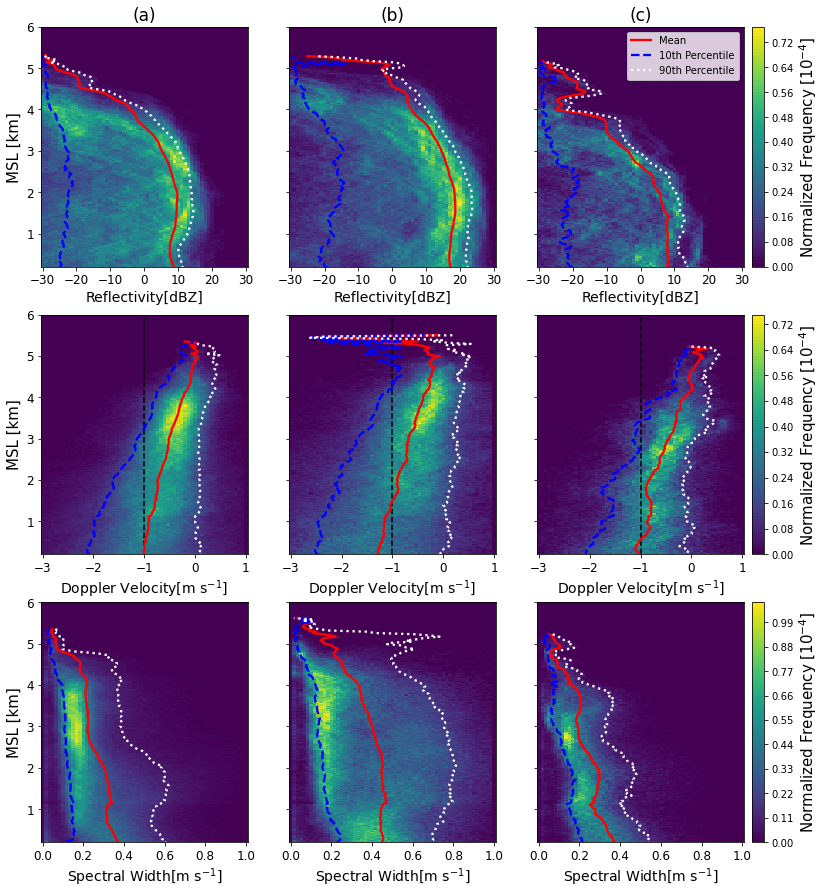

In [10]:
%%time
# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True)

# Specify the bin edges for reflectivity, Doppler velocity, and spectral width
bin_reflectivity = np.linspace(-30, 30, num=61)
bin_velocity = np.linspace(-3, 1, num=61)
bin_width = np.linspace(0, 1, num=61)

# Define custom tick values for x-axis
x_ticks_reflectivity = [-30, -20, -10, 0, 10, 20, 30]
x_ticks_velocity = [-3, -2, -1, 0, 1, 2, 3]
x_ticks_width = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Create a list of data types and titles for the subplots
data_types = [reflectivity, doppler_velocity, spectral_width]
titles = [
    ['Reflectivity[dBZ]', 'Reflectivity[dBZ]', 'Reflectivity[dBZ]'],
    ['Doppler Velocity[m s$^{-1}$]', 'Doppler Velocity[m s$^{-1}$]', 'Doppler Velocity[m s$^{-1}$]'],
    ['Spectral Width[m s$^{-1}$]', 'Spectral Width[m s$^{-1}$]', 'Spectral Width[m s$^{-1}$]']
]

cbar_axes = []  # Create a list to store the colorbar axes

for i in range(3):
    # Iterate through different data types (reflectivity, velocity, and width)
    for j, time_ranges in enumerate([ref_time_ranges_developing, ref_time_ranges_matured, ref_time_ranges_decay]):
        data_slices = []
        for start_time, end_time in time_ranges:
            data_slice = data_types[i].sel(time=slice(start_time, end_time))
            data_slices.append(data_slice)
        cell_data = xr.concat(data_slices, dim='time')
    
        # Call the cfad function based on the data type
        if i == 0:
            bin, height, frequency, cmap, norm, ref_ave, ref_10, ref_90 = cfad(
                data=cell_data.values, bin=bin_reflectivity,
                height=height, h=len(height), colormap='viridis',
                type='ref'
            )
        elif i == 1:
            bin, height, frequency, cmap, norm, ref_ave, ref_10, ref_90 = cfad(
                data=cell_data.values, bin=bin_velocity,
                height=height, h=len(height), colormap='viridis',
                type='vel'
            )
        else:
            bin, height, frequency, cmap, norm, ref_ave, ref_10, ref_90 = cfad(
                data=cell_data.values, bin=bin_width,
                height=height, h=len(height), colormap='viridis',
                type='sw'
            )

        # Create a pcolormesh plot on the current subplot
        cf = axes[i, j].pcolormesh(bin, height / 1000, np.transpose(frequency), cmap=cmap, norm=norm)

        # Set x-axis ticks based on the data type
        if i == 0:
            axes[i, j].set_xticks(x_ticks_reflectivity)
        elif i == 1:
            axes[i, j].set_xticks(x_ticks_velocity)
        else:
            axes[i, j].set_xticks(x_ticks_width)
            
         # Add vertical lines to the second row of subplots
        if i == 1:  # Second row is indexed as 1 (since indexing starts from -1)
            axes[i, j].axvline(x=-1, color='black', linestyle='--')

        # Set subplot titles
        axes[0, 0].set_title('(a)', fontsize=17)
        axes[0, 1].set_title('(b)', fontsize=17)
        axes[0, 2].set_title('(c)', fontsize=17)
        axes[i, j].set_ylim(0.2, 6)

        # Set y-labels for the subplots
        axes[0, 0].set_ylabel("MSL [km]", fontsize=15)
        axes[1, 0].set_ylabel("MSL [km]", fontsize=15)
        axes[2, 0].set_ylabel("MSL [km]", fontsize=15)

        # Set x-labels for the subplots
        axes[i, j].set_xlabel(titles[i][j], fontsize=14)
        axes[i, j].tick_params(axis='both', which='major', labelsize=12)

        # Plot mean, 10th percentile, and 90th percentile lines
        hlim = 205
        axes[i, j].plot(ref_ave[:hlim], height[:hlim] / 1000, c='red', linewidth=2.3, label='Mean')
        axes[i, j].plot(ref_10[:hlim], height[:hlim] / 1000, ls='--', c='blue', linewidth=2.3, label='10th Percentile')
        axes[i, j].plot(ref_90[:hlim], height[:hlim] / 1000, ls='dotted', c='white', linewidth=2.3, label='90th Percentile')

        # Set legend for the last subplot in the row
        axes[0, 2].legend()

    # Create a colorbar for each row and append the colorbar axes to the list
    cbar = fig.colorbar(cf, ax=axes[i, :], orientation='vertical', shrink=1.0, pad=0.01)
    cbar.set_label("Normalized Frequency [10$^{-4}$]", fontsize=15)

    # Define custom colorbar ticks and labels
    current_ticks = cbar.get_ticks()
    if i == 0 or i == 1:
        cbar.set_ticks(current_ticks)
        cbar.set_ticklabels(['0.00', '0.08', '0.16', '0.24', '0.32', '0.40', '0.48', '0.56', '0.64', '0.72'])
    else:
        cbar.set_ticks(current_ticks)
        cbar.set_ticklabels(['0.00', '0.11', '0.22', '0.33', '0.44', '0.55', '0.66', '0.77', '0.88', '0.99'])
    cbar_axes.append(cbar.ax)
    

# Save the figure in two formats
# plt.savefig("./CFAD/cfad-pub.jpg", dpi=1000, bbox_inches='tight')
# plt.savefig("./CFAD/cfad-pub.png", dpi=1000, bbox_inches='tight')


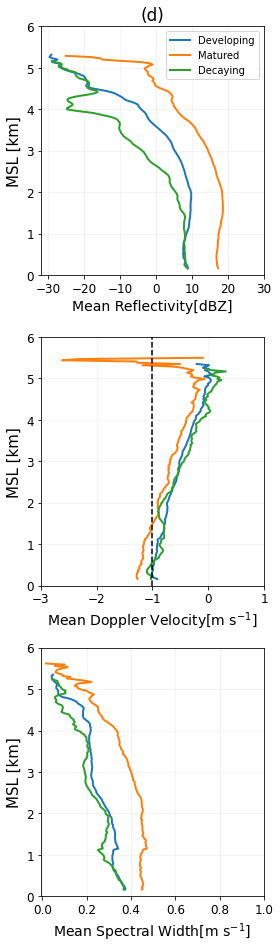

In [27]:
# Create a new figure with a 3x1 layout
fig, axes = plt.subplots(3, 1, figsize=(4, 16))

# Titles and x-ticks for the rows
row_titles = ["Mean Reflectivity", "Mean Doppler Velocity", "Mean Spectral Width"]
x_ticks = [np.linspace(-30, 30, 7), np.linspace(-3, 1, 5), np.linspace(0, 1, 6)]
x_labels = ["Mean Reflectivity[dBZ]", "Mean Doppler Velocity[m s$^{-1}$]", "Mean Spectral Width[m s$^{-1}$]"]

# Set the title only for the first row
axes[0].set_title("(d)", fontsize=17)

# Process and plot mean values for each variable in separate rows
for i in range(3):
    for j, time_ranges in enumerate([ref_time_ranges_developing, ref_time_ranges_matured, ref_time_ranges_decay]):
        # Extract data slices for each stage
        data_slices = []
        for start_time, end_time in time_ranges:
            data_slice = data_types[i].sel(time=slice(start_time, end_time))
            data_slices.append(data_slice)
        cell_data = xr.concat(data_slices, dim='time')

        # Reuse cfad function to get the mean values
        cfad_args = {
            'data': cell_data.values,
            'bin': bin_reflectivity if i == 0 else bin_velocity if i == 1 else bin_width,
            'height': height, 'h': len(height),
            'colormap': 'viridis',
            'type': 'ref' if i == 0 else 'vel' if i == 1 else 'sw'
        }
        _, _, _, _, _, ref_ave, _, _ = cfad(**cfad_args)

        # Plot mean lines for each stage
        axes[i].plot(ref_ave[:205], height[:205] / 1000, label=['Developing', 'Matured', 'Decaying'][j], linewidth=2)
        # Add gridlines
        axes[i].grid(color='gray', alpha=0.1)

    # Set titles, labels, and legends for each subplot
    axes[i].set_ylabel("MSL [km]", fontsize=15)
    axes[i].set_xticks(x_ticks[i])
    axes[i].set_xlabel(x_labels[i], fontsize=14)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    

    # Add legend only to the first plot
    if i == 0:
        axes[i].legend()
    if i == 1:  # Second row is indexed as 1 (since indexing starts from -1)
            axes[i].axvline(x=-1, color='black', linestyle='--')

# Set y-axis limits and ticks
for ax in axes:
    ax.set_ylim(0, 6)
    ax.set_yticks(np.arange(0, 7, 1))
    ax.tick_params(axis='both', which='major', labelsize=12)




# Adjust the space between the plots
plt.subplots_adjust(hspace=0.25)  # Increase the vertical space between the plots

# Save the figure if needed
# plt.savefig("mean_values_plot.jpg", dpi=1000, bbox_inches='tight')
# plt.savefig("mean_values_plot.png", dpi=1000, bbox_inches='tight')


In [28]:
pwd

'/glade/work/noteng/masters-research/comble/CFADS'